Model A fitted.
                                Unobserved Components Results                                 
Dep. Variable:                                      X   No. Observations:                16056
Model:                             local linear trend   Log Likelihood               30915.008
                   + stochastic freq_seasonal(24(12))   AIC                         -61822.016
Date:                                Sat, 12 Jul 2025   BIC                         -61791.287
Time:                                        16:51:06   HQIC                        -61811.853
Sample:                                             0                                         
                                              - 16056                                         
Covariance Type:                                  opg                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

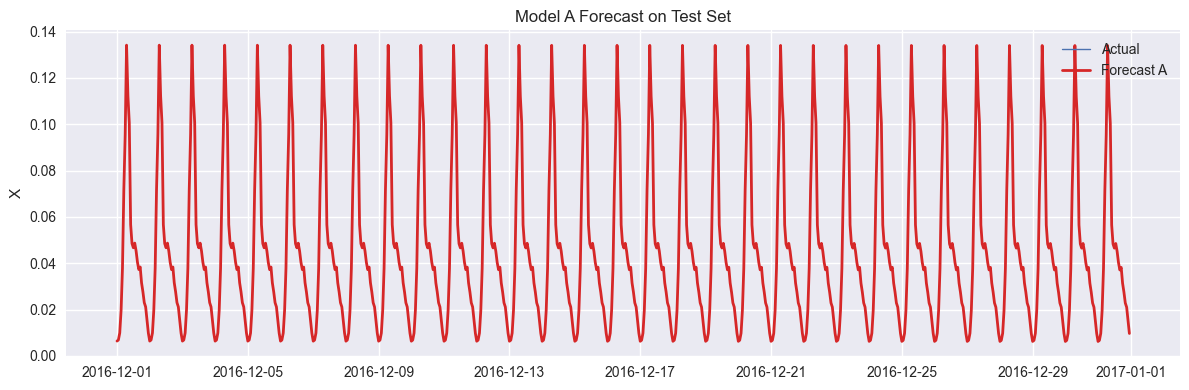

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.tsa.statespace.structural import UnobservedComponents as UCM
from sklearn.metrics import mean_absolute_error

plt.style.use("seaborn-v0_8")
DATA_PATH = Path("../data/ts2024.csv")

# --- Load and preprocess ---
df = pd.read_csv(DATA_PATH)
# Fix datetime column by ensuring time is always present
df["DateTime_fixed"] = df["DateTime"].apply(lambda x: x if " " in x else f"{x} 00:00:00")
df["DateTime"] = pd.to_datetime(df["DateTime_fixed"], errors="coerce")
df.drop(columns=["DateTime_fixed"], inplace=True)

df["Date"] = df["DateTime"].dt.date
df["Hour"] = df["DateTime"].dt.hour

H = 744
test  = df.iloc[-H:]
valid = df.iloc[-2*H:-H]
train = df.iloc[:-2*H]

# --- Fit Model A ---
SEASON_LIST = [{"period": 24, "harmonics": 12}]
MODEL_A = dict(level="local linear trend", freq_seasonal=SEASON_LIST)

def fit_ucm(endog, model_kwargs, exog=None):
    return UCM(endog, exog=exog, **model_kwargs).fit(disp=False)

def forecast_and_score(fit_res, steps, truth=None):
    pred = fit_res.forecast(steps=steps)
    if truth is not None:
        mask = truth.notna()
        mae = mean_absolute_error(truth[mask], pred[mask])
    else:
        mae = None
    return pred, mae

# Fit and forecast on validation
fit_A = fit_ucm(train["X"], model_kwargs=MODEL_A)
print("Model A fitted.")
print(fit_A.summary())

pred_valid_A, mae_valid_A = forecast_and_score(fit_A, H, truth=valid["X"])
print(f"Validation MAE (Model A): {mae_valid_A:.4f}")

# Retrain on train+valid and forecast test
trainval = pd.concat([train, valid])
fit_A_final = fit_ucm(trainval["X"], model_kwargs=MODEL_A)

# Forecast full test set
forecast_all = fit_A_final.forecast(steps=len(test))

# Store full forecast
test_clean = test[["X"]].copy()
test_clean["UCM"] = forecast_all.values

# Compute MAE only where actual values exist
if test["X"].notna().any():
    mae_test = mean_absolute_error(test["X"].dropna(), test_clean.loc[test["X"].notna(), "UCM"])
    print(f"Test MAE (Model A): {mae_test:.4f}")


# --- Plot forecast ---
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(test["DateTime"], test["X"], label="Actual", lw=1)
ax.plot(test["DateTime"], test_clean["UCM"], label="Forecast A", lw=2, color="tab:red")
ax.set(title="Model A Forecast on Test Set", ylabel="X")
ax.legend()
plt.tight_layout()
plt.show()


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\

Hour 0: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 1: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 2: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 3: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 4: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 5: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 6: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 7: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 8: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 9: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 10: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time 

Hour 11: Skipped MAE — all values missing
Hour 12: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 13: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 14: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 15: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 16: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 17: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 18: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 19: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 20: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 21: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Hour 22: Skipped MAE — all values missing


c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Utente\time series\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Utente\AppData\Local\Temp\ipykernel_28112\3161231376.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Hour 23: Skipped MAE — all values missing


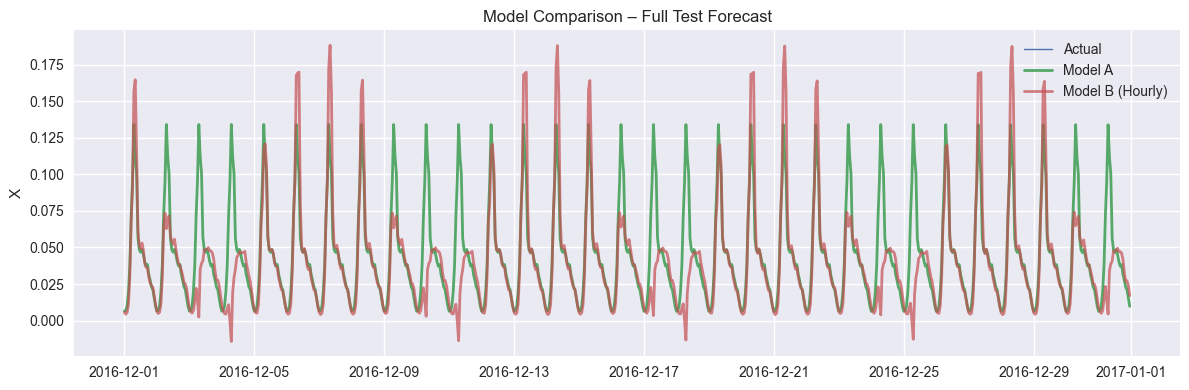

In [5]:
# --- Disaggregated hourly models (Model B) ---
weekly_model = dict(level="local linear trend", freq_seasonal=[{"period": 7, "harmonics": 3}])
residuals_hourly = []
preds = []

for h in range(24):
    sub_trainval = trainval[trainval["Hour"] == h]
    sub_test = test[test["Hour"] == h]
    y_train = sub_trainval["X"]
    y_test = sub_test["X"]

    fit_h = UCM(y_train, **weekly_model).fit(disp=False)
    pred_h = fit_h.forecast(steps=len(y_test))

    # Safe MAE calculation
    mask = y_test.notna()
    pred_h_array = np.asarray(pred_h)
    if mask.sum() > 0:
        mae = mean_absolute_error(y_test[mask].values, pred_h_array[mask])
        print(f"Hour {h}: MAE = {mae:.4f}")
    else:
        print(f"Hour {h}: Skipped MAE — all values missing")

    preds.append(pd.Series(pred_h_array, index=sub_test.index))
    residuals_hourly.append(y_train - fit_h.fittedvalues)
    
# Merge hourly forecasts
test["UCM_hourly"] = pd.concat(preds).sort_index()

# --- Compare Models ---
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(test["DateTime"], test["X"], label="Actual", lw=1)
ax.plot(test["DateTime"], test_clean["UCM"], label="Model A", lw=2)
ax.plot(test["DateTime"], test["UCM_hourly"], label="Model B (Hourly)", lw=2, alpha=0.7)
ax.set(title="Model Comparison – Full Test Forecast", ylabel="X")
ax.legend()
plt.tight_layout()
plt.show()


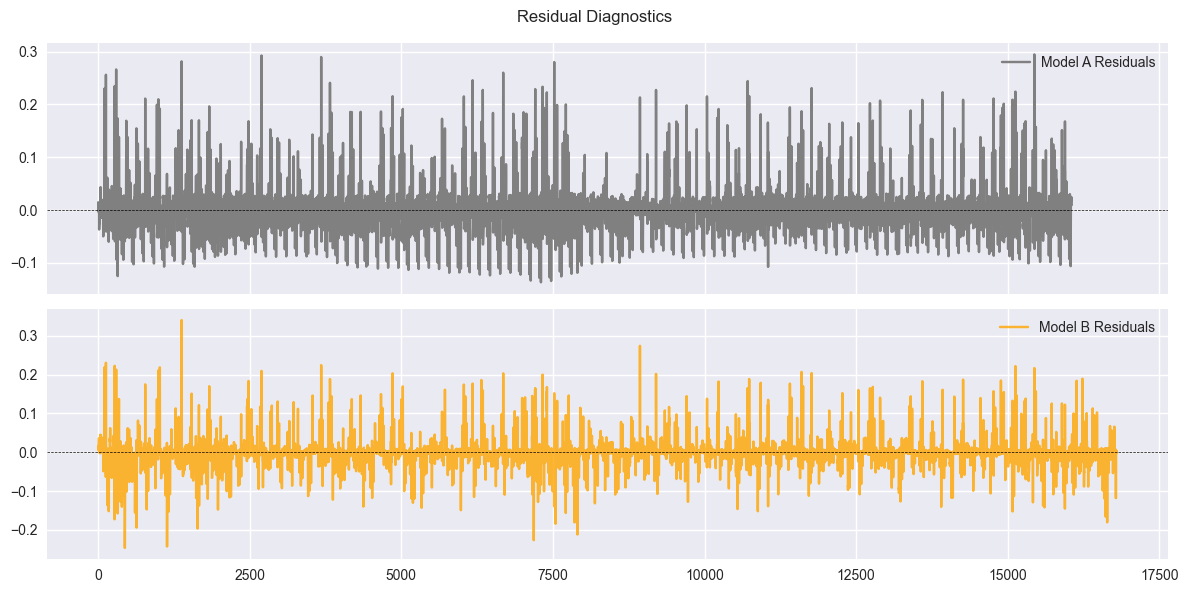

In [6]:
# --- Residual Diagnostics ---
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axs[0].plot(fit_A.resid, label="Model A Residuals", color="gray")
axs[0].axhline(0, linestyle="--", color="black", lw=0.5)
axs[0].legend()

hourly_concat_res = pd.concat(residuals_hourly).sort_index()
axs[1].plot(hourly_concat_res, label="Model B Residuals", color="orange", alpha=0.8)
axs[1].axhline(0, linestyle="--", color="black", lw=0.5)
axs[1].legend()
plt.suptitle("Residual Diagnostics")
plt.tight_layout()
plt.show()


In [ ]:
# --- Final Output ---
output = test.copy()
output["UCM"] = test_clean["UCM"]
output.to_csv("../data/ts2024_test_forecast_ucm.csv", index=False)
print("Saved test forecast with UCM → ../data/ts2024_test_forecast_ucm.csv")
